In [5]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [7]:
# Function to load images and their labels from the dataset folder
def load_images_from_folder(folder_path, image_size=(128, 128)):
    images = []
    labels = []
    class_names = os.listdir(folder_path)
    for label, class_name in enumerate(class_names):
        class_path = os.path.join(folder_path, class_name)
        for filename in os.listdir(class_path):
            img = load_img(os.path.join(class_path, filename), target_size=image_size)
            img_array = img_to_array(img) / 255.0  # Normalize pixel values
            images.append(img_array)
            labels.append(label)

    return np.array(images), np.array(labels), class_names

In [9]:
# Load the dataset
dataset_path = r'D:\Neeraj\SEM 7\DLE LAB\Bean_Dataset\Bean_Dataset'
X, y, class_names = load_images_from_folder(dataset_path)
print(f"Loaded {X.shape[0]} images of size {X.shape[1:]}.")

Loaded 990 images of size (128, 128, 3).


In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Flatten the image data to feed into the DNN
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [15]:
# Convert labels to one-hot encoding
num_classes = len(class_names)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
# Build the DNN model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_flat.shape[1],)),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_flat, y_train, epochs=10, validation_split=0.2, batch_size=32)

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.3169 - loss: 24.5249 - val_accuracy: 0.3270 - val_loss: 12.7467
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.3883 - loss: 8.0648 - val_accuracy: 0.5472 - val_loss: 1.3687
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - accuracy: 0.5916 - loss: 1.3681 - val_accuracy: 0.4717 - val_loss: 1.4276
Epoch 4/10
10/20 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.4704 - loss: 1.4910

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
# Generate predictions and evaluate the model
y_pred = np.argmax(model.predict(X_test_flat), axis=-1)
y_true = np.argmax(y_test, axis=-1)

In [ ]:
# Display the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

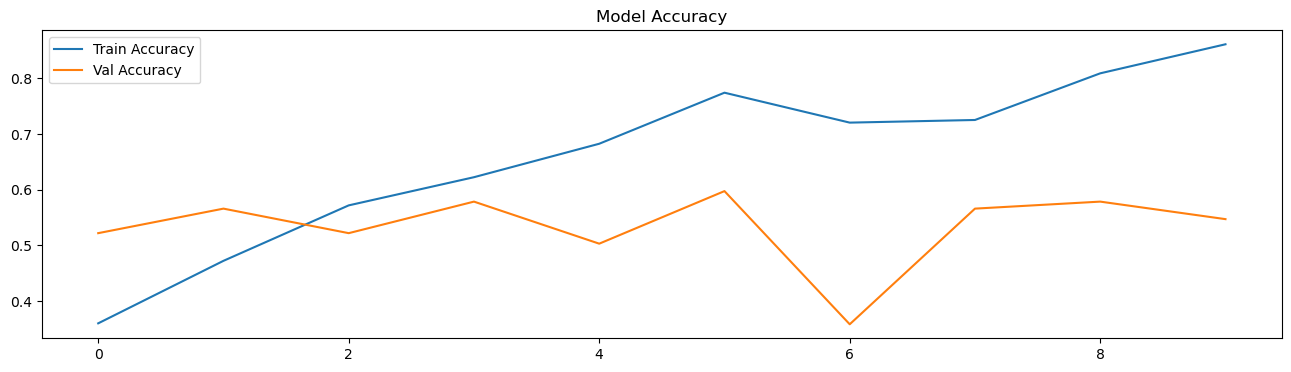

In [69]:
plt.figure(figsize=(16,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

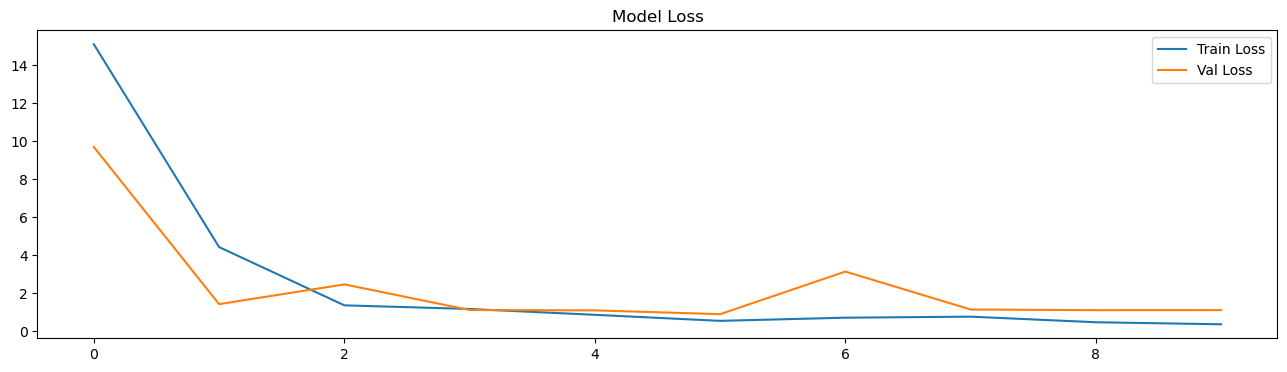

In [71]:
plt.figure(figsize=(16,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.show()